#1º Congresso Capixaba de Neurologia

http://congressocapixabaneuro.com.br/

#Prevendo a Ocorrência de Crises Epilépticas com uso de Inteligência Artificial

##Bibliotecas

In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np

##Carregando Arquivo

In [ ]:
#Permitir a importação/exportação dos dados do GoogleDrive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Leitura dos dados
caminho = "/gdrive/My Drive/Medicina/Projetos/Congressos/1_CONGRESSO_CAPIXABA_DE_NEUROLOGIA_2020/Epilepsia/"
arquivo = "epilepsia_dados.csv"
df_0 = pd.read_csv(caminho+arquivo)

##Visualizando os Dados

In [ ]:
df_0.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


##Informações sobre o atributo:

https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

O conjunto de dados original da referência consiste em 5 pastas diferentes, cada uma com 100 arquivos, com cada arquivo representando um único sujeito / pessoa. Cada arquivo é uma gravação da atividade cerebral por 23,6 segundos. A série temporal correspondente é amostrada em 4097 pontos de dados. Cada ponto de dados é o valor do registro de EEG em um ponto diferente no tempo. Portanto, temos um total de 500 indivíduos, cada um com 4097 pontos de dados por 23,5 segundos.

Dividimos e embaralhamos cada 4097 pontos de dados em 23 blocos, cada bloco contém 178 pontos de dados por 1 segundo e cada ponto de dados é o valor do registro EEG em um ponto diferente no tempo. Portanto, agora temos 23 x 500 = 11.500 informações (linha), cada informação contém 178 pontos de dados por 1 segundo (coluna), a última coluna representa o rótulo y {1,2,3,4,5}.

A variável de resposta é y na coluna 179, as Variáveis ​​explicativas X1, X2, ..., X178

y contêm a categoria do vetor de entrada de 178 dimensões. Especificamente em {1, 2, 3, 4, 5}:

5 - olhos abertos, significa que quando eles estavam gravando o sinal de EEG do cérebro, o paciente estava com os olhos abertos

4 - olhos fechados, significa quando eles estavam gravando o sinal de EEG o paciente estava com os olhos fechados

3 - Sim, eles identificam onde estava a região do tumor no cérebro e registram a atividade EEG da área cerebral saudável

2 - Eles registram o EEG da área onde o tumor estava localizado

1 - Registro da convulsão atividade

Todos os sujeitos que estão nas classes 2, 3, 4 e 5 são sujeitos que não tiveram crises epilépticas. Apenas os sujeitos da classe 1 têm ataques epilépticos. Nossa motivação para criar esta versão dos dados foi simplificar o acesso aos dados por meio da criação de uma versão .csv deles. Embora existam 5 classes, a maioria dos autores fez uma classificação binária, nomeadamente a classe 1 (crise epiléptica) contra as restantes.

##01 - Análise Exploratória


In [ ]:
df_0.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
df_0.shape

(11500, 180)

In [ ]:
#Criar uma coluna nova (Convulsao) que vai representar se o paciente está ou não tendo uma convulsão
df_0["Convulsao"] = df_0["y"] == 1

In [ ]:
df_0.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y,Convulsao
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4,False
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1,True
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5,False
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5,False
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5,False


In [ ]:
#Convertendo a coluna Convulsao de Lógico para Binário
df_0["Convulsao"] = df_0["Convulsao"].astype(int)

In [ ]:
df_0.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y,Convulsao
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5,0


In [ ]:
#Remover a coluna y
df_0.drop("y", axis=1, inplace=True)

In [ ]:
df_0.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,Convulsao
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
#Removendo a coluna Unnamed: 0, pois essa é só um identificador
df_0.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df_0.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,Convulsao
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
# Esta função calcula a prevalência da classe positiva (label = 1)
def calcula_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)


print("Prevalência da classe positiva: %.3f"% calcula_prevalencia(df_0["Convulsao"].values))

Prevalência da classe positiva: 0.200


##02 - Preparação dos Dados

In [ ]:
#Coletando as Colunas para inputar os dados
cols_input = df_0.drop("Convulsao", axis=1).columns.tolist()

In [ ]:
cols_input

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X72',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X121',
 'X122',
 'X123',
 

In [ ]:
# Checando se temos colunas duplicadas nos dados de entrada

dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "você duplicou colunas em cols_input"

set()


##03 - Modelagem

###Divisão dos Dados em Treino, Validação e Teste

In [ ]:
# Gerando amostras aleatórias dos dados
df_0 = df_0.sample(n = len(df_0))

# Ajustando os índices do dataset
df_0 = df_0.reset_index(drop = True)

In [ ]:
# Gera um índice para a divisão
df_valid_teste = df_0.sample(frac = 0.3)
print("Tamanho da divisão de validação / teste: %.1f" % (len(df_valid_teste) / len(df_0)))

Tamanho da divisão de validação / teste: 0.3


In [ ]:
# Fazendo a divisão

# Dados de teste
df_teste = df_valid_teste.sample(frac = 0.5)

# Dados se validação
df_valid = df_valid_teste.drop(df_teste.index)

# Dados de treino
df_treino = df_0.drop(df_valid_teste.index)

In [ ]:
# Verifique a prevalência de cada subconjunto
print(
    "Teste(n = %d): %.3f"
    % (len(df_teste), calcula_prevalencia(df_teste['Convulsao'].values))
)
print(
    "Validação(n = %d): %.3f"
    % (len(df_valid), calcula_prevalencia(df_valid['Convulsao'].values))
)
print(
    "Treino(n = %d): %.3f"
    % (len(df_treino), calcula_prevalencia(df_treino['Convulsao'].values))
)

Teste(n = 1725): 0.206
Validação(n = 1725): 0.194
Treino(n = 8050): 0.200


In [ ]:
print('Todas as amostras (n = %d)'%len(df_0))
assert len(df_0) == (len(df_teste)+len(df_valid)+len(df_treino)),'algo saiu errado'

Todas as amostras (n = 11500)


###Balanceando os Dados de Treino

In [ ]:
# Cria um índice
rows_pos = df_treino['Convulsao'] == 1

# Define valores positivos e negativos do índice
df_train_pos = df_treino.loc[rows_pos]
df_train_neg = df_treino.loc[~rows_pos]

# Valor mínimo
n = np.min([len(df_train_pos), len(df_train_neg)])

# Obtém valores aleatórios para o dataset de treino
df_treino_final = pd.concat([df_train_pos.sample(n=n, random_state=69), 
                             df_train_neg.sample(n=n, random_state=69)], 
                            axis=0, 
                            ignore_index=True)

df_treino_final = df_treino_final.sample(n = len(df_treino_final), random_state=69).reset_index(drop = True)

print('Balanceamento em Treino(n = %d): %.3f'%(len(df_treino_final), calcula_prevalencia(df_treino_final['Convulsao'].values)))

Balanceamento em Treino(n = 3220): 0.500


###Salvando os Dados em Disco

In [ ]:
# Salvamos todos os datasets em disco no formato csv.
df_treino.to_csv(caminho + 'dados_treino.csv',index=False)
df_treino_final.to_csv(caminho + 'dados_treino_final.csv',index=False)
df_valid.to_csv(caminho + 'dados_valid.csv',index=False)
df_teste.to_csv(caminho + 'dados_teste.csv',index=False)

# Salvamos os dados de entrada (colunas preditoras) para facilitar a utilização mais tarde
import pickle
pickle.dump(cols_input, open(caminho + 'cols_input.sav', 'wb'))

###Criando as Matrizes X e Y

In [ ]:
# Cria as matrizes X e Y

# X
X_treino = df_treino_final.drop('Convulsao', axis=1).values
X_valid = df_valid.drop('Convulsao', axis=1).values

# Y
y_treino = df_treino_final['Convulsao'].values
y_valid = df_valid['Convulsao'].values

# Print
print('Shape dos dados de treino:', X_treino.shape, y_treino.shape)
print('Shape dos dados de validação:', X_valid.shape, y_valid.shape)

Shape dos dados de treino: (3220, 178) (3220,)
Shape dos dados de validação: (1725, 178) (1725,)


In [ ]:
X_treino

array([[  -7,  -56, -116, ...,   -7,   -9,  -19],
       [ 282,  204,  124, ...,  290,  346,  390],
       [  21,    8,    3, ...,   65,   95,  119],
       ...,
       [ -26,  -31,  -27, ...,   23,   21,   18],
       [  41,   28,    8, ...,   -7,  -20,  -45],
       [-157, -157, -142, ..., -205, -162,  -92]])

###Normalizando os Dados

In [ ]:
# Prepara o objeto para normalizar os dados
from sklearn.preprocessing import StandardScaler

# Crio o objeto
scaler = StandardScaler()

# Faço o fit
scaler.fit(X_treino)

# Salva o objeto em disco e carrega para usamos adiante
scalerfile = caminho + 'scaler.sav'

import pickle
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# Aplica a normalização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)

In [ ]:
X_treino_tf

array([[ 0.04019694, -0.1641923 , -0.42013049, ...,  0.04054845,
         0.02313718, -0.02634342],
       [ 1.22766609,  0.90231242,  0.5710222 , ...,  1.26094525,
         1.49411096,  1.66035796],
       [ 0.15524585,  0.09833194,  0.07131605, ...,  0.33640222,
         0.45407034,  0.54276364],
       ...,
       [-0.03787197, -0.06164377, -0.05257803, ...,  0.16382086,
         0.14744482,  0.12624325],
       [ 0.23742365,  0.18037076,  0.09196507, ...,  0.04054845,
        -0.02244229, -0.13356649],
       [-0.57613653, -0.57848837, -0.52750537, ..., -0.77304941,
        -0.6108318 , -0.32739281]])

###Construção do Modelo

####Funções Auxiliares

In [ ]:
# Importa as funções necessárias
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

# Função para calcular a especificidade
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

# Função para gerar relatório de métricas
def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('Acurácia:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('Especificidade:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [ ]:
import sklearn as sk

In [ ]:
#Como equilibramos nossos dados de treinamento, vamos definir nosso limite em 0,5 para rotular uma amostra prevista como positiva.
thresh = 0.5

###Modelo 01 - Regressão Logística

In [ ]:
# Construção do modelo

# Import
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Cria o classificador (objeto)
lr = LogisticRegression(random_state = 142)

# Treina e cria o modelo
modelo_v1 = lr.fit(X_treino_tf, y_treino)

# Previsões 
y_train_preds = lr.predict_proba(X_treino_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Regressão Logística \n')

print('Treinamento:')
lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity = print_report(y_treino, y_train_preds, thresh)

print('Validação:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, lr_valid_precision, lr_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Regressão Logística 

Treinamento:
AUC:0.618
Acurácia:0.656
Recall:0.521
Precisão:0.713
Especificidade:0.791
 
Validação:
AUC:0.522
Acurácia:0.701
Recall:0.445
Precisão:0.311
Especificidade:0.763
 


###Modelo 02 - Naive Bayes

In [ ]:
# Construção do modelo

# Imports
from sklearn.naive_bayes import GaussianNB

# Cria o classificador (objeto)
nb = GaussianNB()

# Treina e cria o modelo
modelo_v2 = nb.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = nb.predict_proba(X_treino_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes \n')

print('Treinamento:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity = print_report(y_treino, y_train_preds, thresh)

print('Validação:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Naive Bayes 

Treinamento:
AUC:0.984
Acurácia:0.943
Recall:0.911
Precisão:0.973
Especificidade:0.975
 
Validação:
AUC:0.986
Acurácia:0.958
Recall:0.884
Precisão:0.897
Especificidade:0.976
 


###Modelo 03 - XGBoost (Xtreme Gradient Boosting Classifier)

In [ ]:
# Construção do modelo

# Imports
from xgboost import XGBClassifier
import xgboost as xgb

# Cria o classificador
xgbc = XGBClassifier()

# Treina e cria o modelo
modelo_v3 = xgbc.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = xgbc.predict_proba(X_treino_tf)[:,1]
y_valid_preds = xgbc.predict_proba(X_valid_tf)[:,1]

print('Xtreme Gradient Boosting Classifier \n')

print('Treinamento:')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(y_treino, y_train_preds, thresh)

print('Validação:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Xtreme Gradient Boosting Classifier 

Treinamento:
AUC:0.999
Acurácia:0.987
Recall:0.985
Precisão:0.989
Especificidade:0.989
 
Validação:
AUC:0.993
Acurácia:0.961
Recall:0.922
Precisão:0.880
Especificidade:0.970
 


##05 - Avaliação e Interpretação dos Resultados

In [ ]:
#dataframe com esses resultados
df_results = pd.DataFrame({'classificador':['RL','RL','NB','NB','XGB','XGB'],
                           'data_set':['treino','validação']*3,
                          'auc':[lr_train_auc,lr_valid_auc,nb_train_auc,nb_valid_auc,xgbc_train_auc,xgbc_valid_auc],
                          'accuracy':[lr_train_accuracy,lr_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy],
                          'recall':[lr_train_recall,lr_valid_recall,nb_train_recall,nb_valid_recall,xgbc_train_recall,xgbc_valid_recall],
                          'precision':[lr_train_precision,lr_valid_precision,nb_train_precision,nb_valid_precision,xgbc_train_precision,xgbc_valid_precision],
                          'specificity':[lr_train_specificity,lr_valid_specificity,nb_train_specificity,nb_valid_specificity,xgbc_train_specificity,xgbc_valid_specificity]})

In [ ]:
df_results

,classificador,data_set,auc,accuracy,recall,precision,specificity
0,RL,treino,0.618493,0.655901,0.521118,0.713435,0.790683
1,RL,validação,0.521510,0.700870,0.444776,0.311065,0.762590
2,NB,treino,0.984483,0.942857,0.910559,0.973440,0.975155
3,NB,validação,0.985868,0.957681,0.883582,0.896970,0.975540
4,XGB,treino,0.999336,0.987267,0.985093,0.989395,0.989441
5,XGB,validação,0.992731,0.960580,0.922388,0.880342,0.969784


In [ ]:
#plotar os resultados usando o seaborn

#Imports e definição do estilo do gráfico no seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "whitegrid")

import matplotlib as m

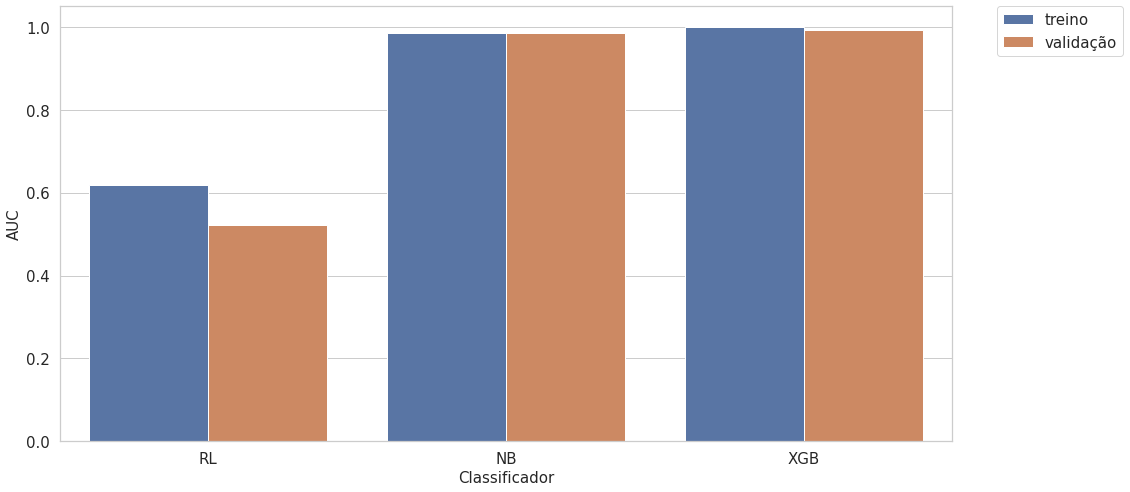

In [ ]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classificador', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

###Gravando o melhor modelo

In [ ]:
# Grava o modelo em disco

import pickle

pickle.dump(modelo_v3, open(caminho + 'melhor_modelo.pkl', 'wb'), protocol = 4)

###Avaliando o Modelo

In [ ]:
# Carrega o modelo, as colunas e o scaler
best_model = pickle.load(open(caminho + 'melhor_modelo.pkl','rb'))
cols_input = pickle.load(open(caminho + 'cols_input.sav','rb'))
scaler = pickle.load(open(caminho + 'scaler.sav', 'rb'))

# Carrega os dados
df_train = pd.read_csv(caminho + 'dados_treino.csv')
df_valid= pd.read_csv(caminho + 'dados_valid.csv')
df_test= pd.read_csv(caminho + 'dados_teste.csv')

# Cria matrizes x e y

# X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

# Y
y_train = df_train['Convulsao'].values
y_valid = df_valid['Convulsao'].values
y_test = df_test['Convulsao'].values

# Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [ ]:
#Calcular probabilidades de previsão.
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [ ]:
thresh = 0.5

print('\nTreinamento:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)

print('\nValidação:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)

print('\nTeste:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)


Treinamento:
AUC:0.997
Acurácia:0.973
Recall:0.985
Precisão:0.893
Especificidade:0.970
 

Validação:
AUC:0.993
Acurácia:0.961
Recall:0.922
Precisão:0.880
Especificidade:0.970
 

Teste:
AUC:0.990
Acurácia:0.957
Recall:0.927
Precisão:0.870
Especificidade:0.964
 


###Curva ROC

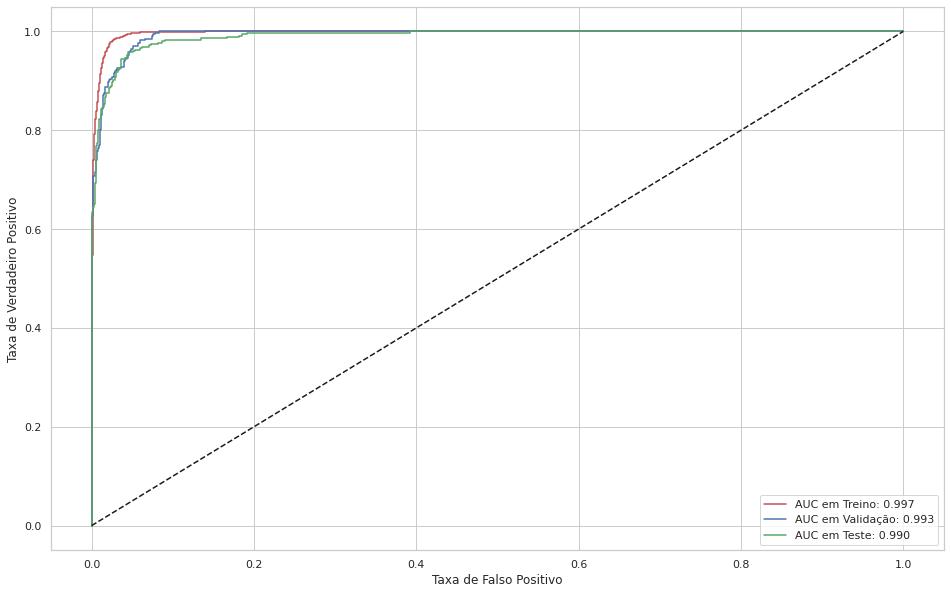

In [ ]:
# Imports
from sklearn.metrics import roc_curve 

# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='AUC em Treino: %.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='AUC em Validação: %.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='AUC em Teste: %.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()